In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

def visualize(data, figsize=(15, 15)):
    
    plt.figure(figsize=figsize)
    
    step_value = pd.DataFrame(data.groupby(by='episode')["step"].max())
    step_value.reset_index(inplace=True)

    plt.title("last step hist")
    sns.histplot(data=step_value, x=step_value.step, bins=5)
    plt.show()

    # 상관관계 시각화 & des
    def heatmap(data):
        df = data.drop(columns=['reward', 'step'])
        corr = df.corr()
        fig, ax = plt.subplots(figsize=(10, 10))

        # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        # 히트맵을 그린다
        sns.heatmap(
            corr,
            cmap='RdYlBu_r',
            annot=True,  # 실제 값을 표시한다
            mask=mask,  # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
            vmin=-1,
            vmax=1  # 컬러바 범위 -1 ~ 1
        )

        plt.title('Correation Matrix', fontsize=20)
        plt.show()

    heatmap(data)

    # 그래프
    col_names = data.columns.to_list()
    col_names.remove('step')
    col_names.remove('episode')
    col_names.remove('reward')
    col_names.remove('done')

    for col in col_names:
        fig, ax = plt.subplots(figsize=figsize)
        sns.histplot(x=data[col])

    # 기초 통계량
    print(data.describe())

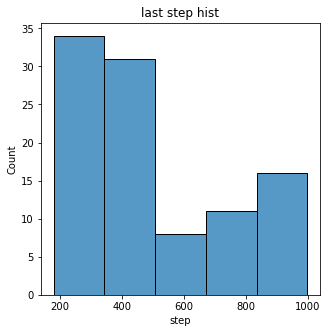

C:\Users\kuro1\AppData\Local\Temp/ipykernel_31288/72374062.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


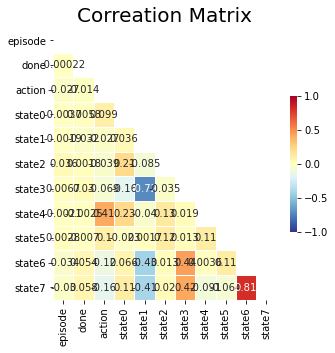

               step       episode        reward        action        state0  \
count  51566.000000  51566.000000  51566.000000  51566.000000  51566.000000   
mean     317.949250     49.641644      0.296747      1.624772     -0.125659   
std      243.189493     28.701094      5.288727      0.992444      0.418524   
min        0.000000      0.000000   -100.000000      0.000000     -0.999639   
25%      128.000000     27.000000     -1.318615      1.000000     -0.554227   
50%      259.000000     47.000000      0.000010      2.000000     -0.056845   
75%      452.000000     75.000000      1.398815      2.000000      0.243911   
max      999.000000     99.000000    100.000000      3.000000      0.577047   

             state1        state2        state3        state4        state5  \
count  51566.000000  51566.000000  51566.000000  51566.000000  51566.000000   
mean       0.306684     -0.013707     -0.120497      0.005859     -0.000053   
std        0.407569      0.183170      0.162372    

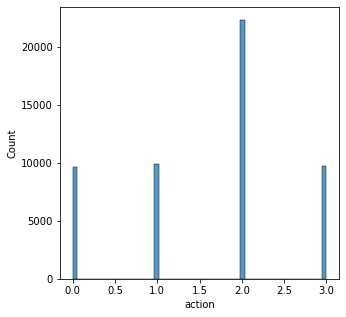

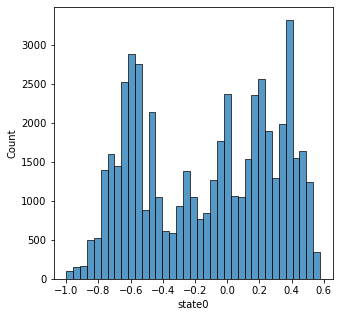

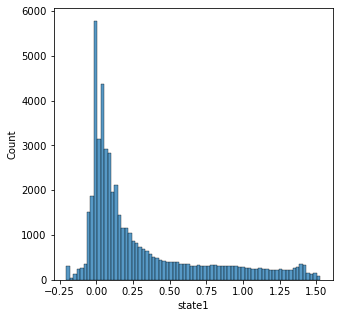

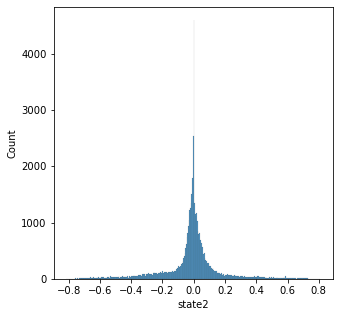

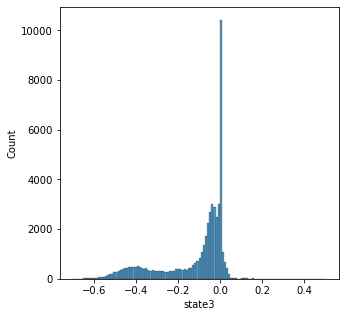

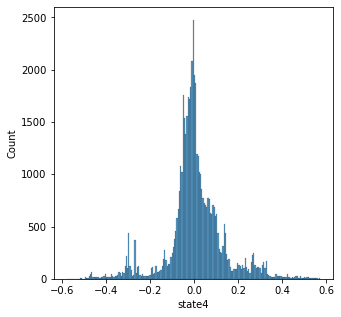

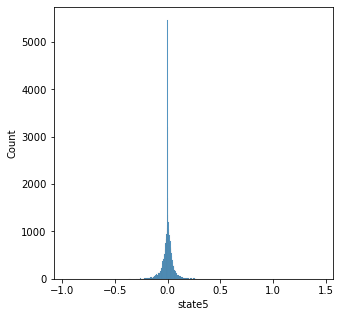

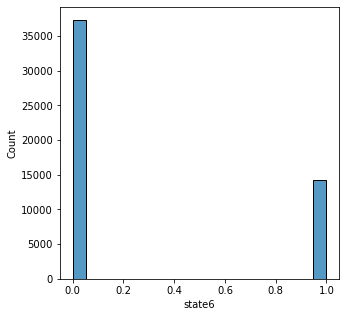

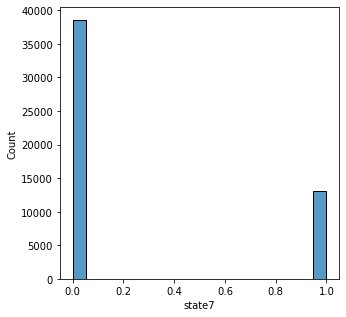

In [2]:
filename = "DDQN_LunarLander-v2_train=False_intvl=1_rwdscl=1.0_node=256_lRate=0.0005_gma=0.98_nBuf=100000_nBat=64_nStrt=10000_updIntvl=20_1634913456"
data = pd.read_csv(f"./logs/{filename}.csv")
visualize(data, (5, 5))

In [8]:
data.groupby(by='episode')["step"].describe()

,count,mean,std,min,25%,50%,75%,max
episode,,,,,,,,
0,286.0,142.5,82.705300,0.0,71.25,142.5,213.75,285.0
1,597.0,298.0,172.483333,0.0,149.00,298.0,447.00,596.0
2,295.0,147.0,85.303380,0.0,73.50,147.0,220.50,294.0
3,360.0,179.5,104.067286,0.0,89.75,179.5,269.25,359.0
4,1000.0,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
...,...,...,...,...,...,...,...,...
95,313.0,156.0,90.499540,0.0,78.00,156.0,234.00,312.0
96,1000.0,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
97,341.0,170.0,98.582453,0.0,85.00,170.0,255.00,340.0


In [9]:
step_value = pd.DataFrame(data.groupby(by='episode')["step"].max())
step_value.reset_index(inplace=True)
step_value

,episode,step
0,0,285
1,1,596
2,2,294
3,3,359
4,4,999
...,...,...
95,95,312
96,96,999
97,97,340
98,98,999


<AxesSubplot:xlabel='step', ylabel='Count'>

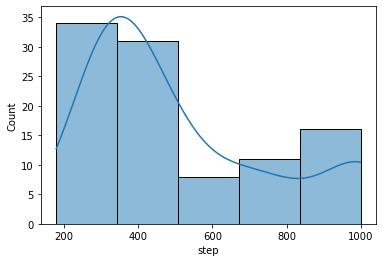

In [10]:
sns.histplot(data=step_value,x=step_value.step,bins=5)

<AxesSubplot:title={'center':'last step hist'}, xlabel='step', ylabel='Count'>

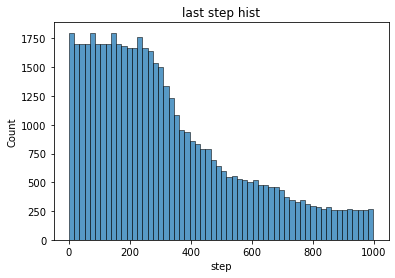

In [12]:
plt.title("last step hist")
sns.histplot(x=data["step"])